# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
# Reading csv and creat dataframe
customer_churn = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Advanced_Machine_Learning/Project03/BankChurners.csv" )

In [ ]:
# Copy of the data
data = customer_churn.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Check the first 5 rows of dataset
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# Check the last 5 rows of dataset
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
# Check number of rows and columns of dataset
data.shape

(10127, 21)

*  Dataset has 10127 rows and 21 columns

In [ ]:
# Check datatypes of dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are total 21 columns with 15 numerical type and 6 object type
* Education_Level and Marital_Status has some null values

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* The customer avg age is 46 which shows middle age demographic, most customers between 41 and 52 years. The minimum age is 26, and the oldest customer is 73.
* The average customer has around 2 dependents, with some customers having none and others up to 5.
* The average customer has been with the bank for around 36 months, with a maximum tenure of 56 months and a minimum of 13 months. This shows that most customers maintain relatively long-standing relationships with the bank
* On average, customers maintain around 3.81 products or services with the bank, with a distribution between 1 to 6. This indicates strong engagement, as customers typically hold multiple banking products.
*  On average, customers were inactive for around 2.34 months out of the past 12 months. The majority were inactive for 2 to 3 months
*  Customers have an average of 2.46 contacts with the bank per year.
*  The average credit limit stands at 8,631, but with significant variability (SD: 9,088). The wide range (min: 1,438, max: 34,516) indicates a diverse customer base, While the median credit limit is more moderate at 4,549
*  The average revolving balance is 1,162,The median value of 1,276 suggests that many customers revolve a significant portion of their credit, although a minority carries no balance at all.
*  The average utilization ratio is 27.5%, with many customers utilizing less than 50% of their available credit.
*  The average customer spends around 4,404 annually, with significant variability across the customer base (min: 510, max: 18,484).
*  On average, customers make around 65 transactions annually.
*  There is moderate growth in transaction volumes from Q4 to Q1, with a median change of 0.70
*  The median change in transaction amounts from Q4 to Q1 is 0.74
*  The average amount of available credit (open to buy) is 7,469,

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


*  A large majority of customers are existing customers i,e. retained
*  There is a slight majority of female customers around 53%, while male customers make up the remaining 47%.
*  A significant portion of customers are graduates i.e. around 36%
*  Almost Half of the customers are married.
*  A large segment of the customer base (35%) falls under the "Less than $40K" income category.
*  he vast majority of customers (93%) hold the basic "Blue" credit card.

In [ ]:
# Print unique values for object columns

for column in data.columns:
  if data[column].dtype == object:
    print("Unique values in", column, "are :")
    print(data[column].value_counts())
    print("-"*100 )

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Unique values in Income_Category are :


*  Income category has value abc which needs to be treated

In [ ]:
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

##### Dropping CLIENTNUM (ID) column

In [ ]:
# Looking at the data CLIENTNUM column is not needed so it can be dropped
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

In [ ]:
data['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
0,8500
1,1627


In [ ]:
data.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,1,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,1,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Univariate Analysis

###### Customer Age

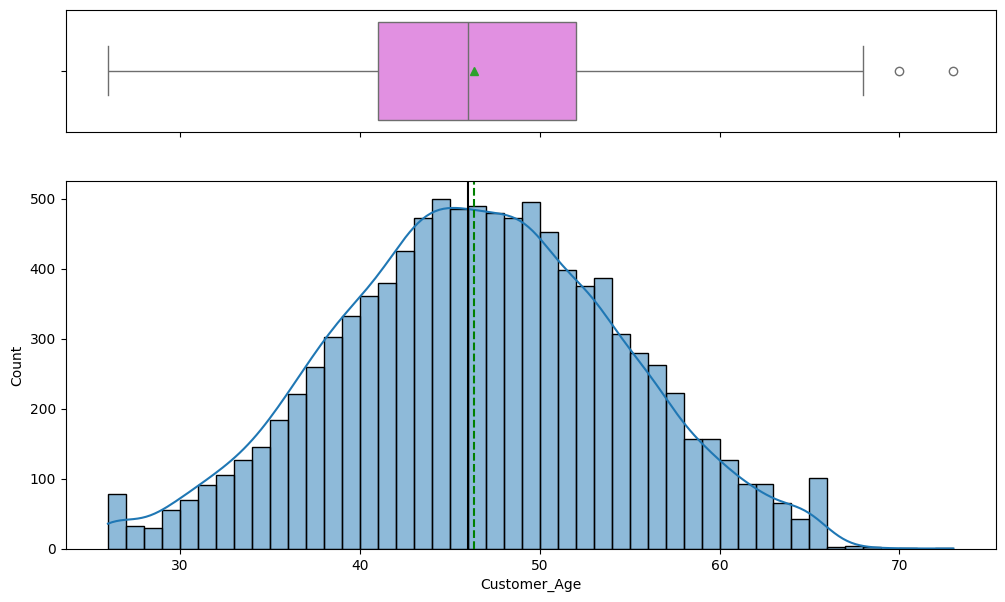

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)

* The data is normally distributed with only 2 outliers on higher end

###### Months_on_book

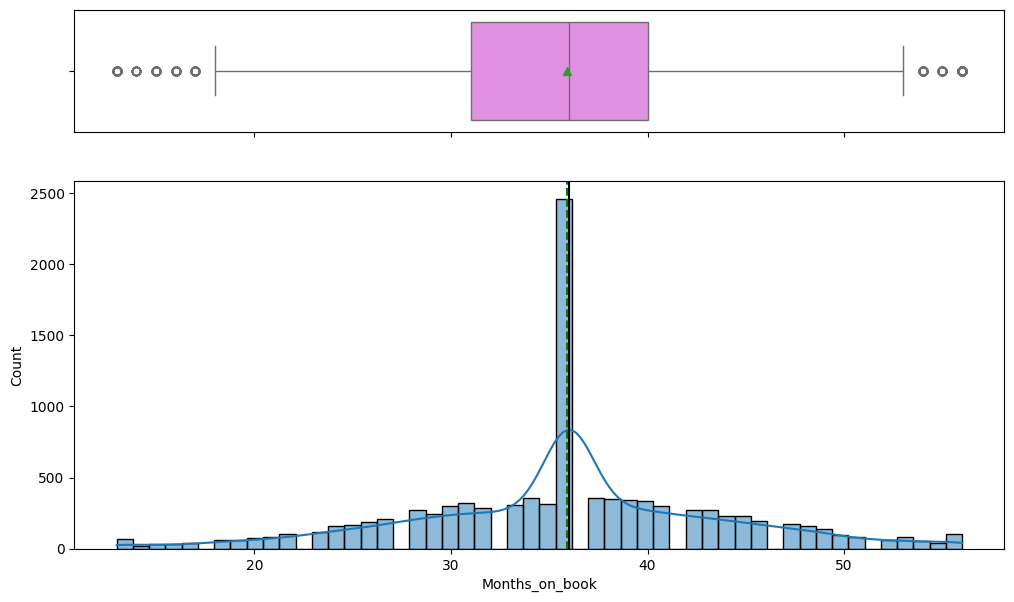

In [ ]:
histogram_boxplot(data, "Months_on_book", kde=True)

* Most customers are on the books for around >36 months
* As per the boxplot there are outliers on both the higher and lower ends.

###### Credit_Limit

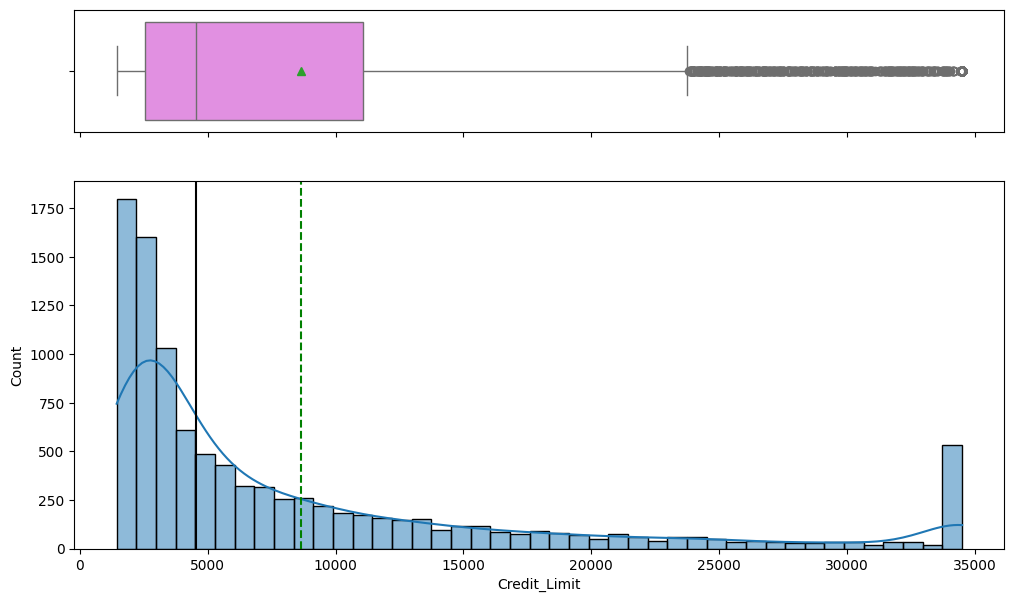

In [ ]:
histogram_boxplot(data, "Credit_Limit", kde=True)

* The data is highly right skewed with the average limit around dollar 8k and median around 5k
* There are many outliers on the higher.


###### Total_Revolving_Bal

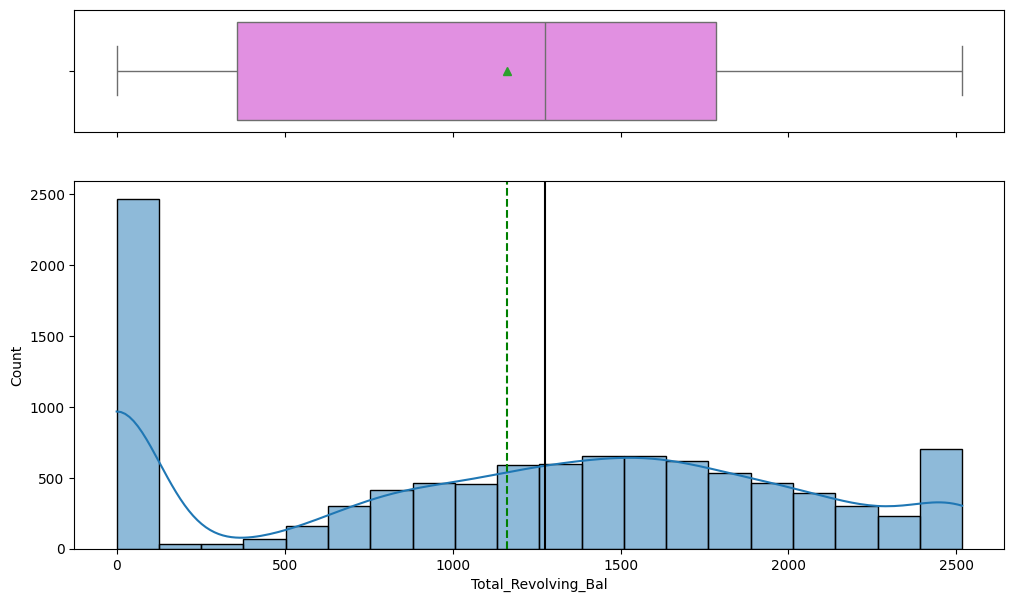

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

* Total revolving balance varies from 0 to 2500, with mean aroun 1200. Most of the customers seems to 0 balance
* There are no outliers in data


###### Avg_Open_To_Buy

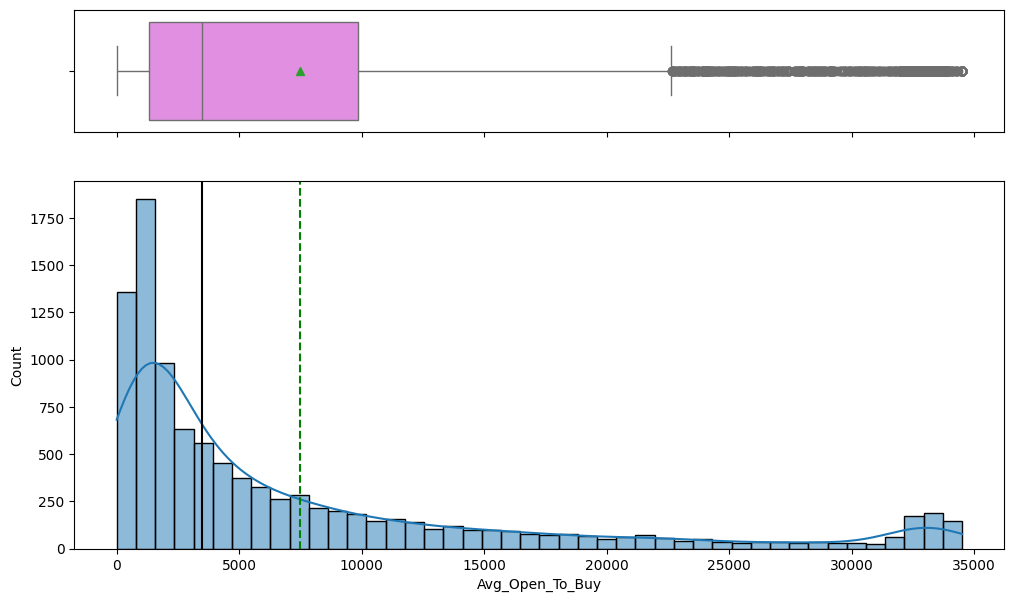

In [ ]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

* The data highly right skewed
* Average Open to Buy has lots of higher end outliers.

###### Total_Trans_Ct

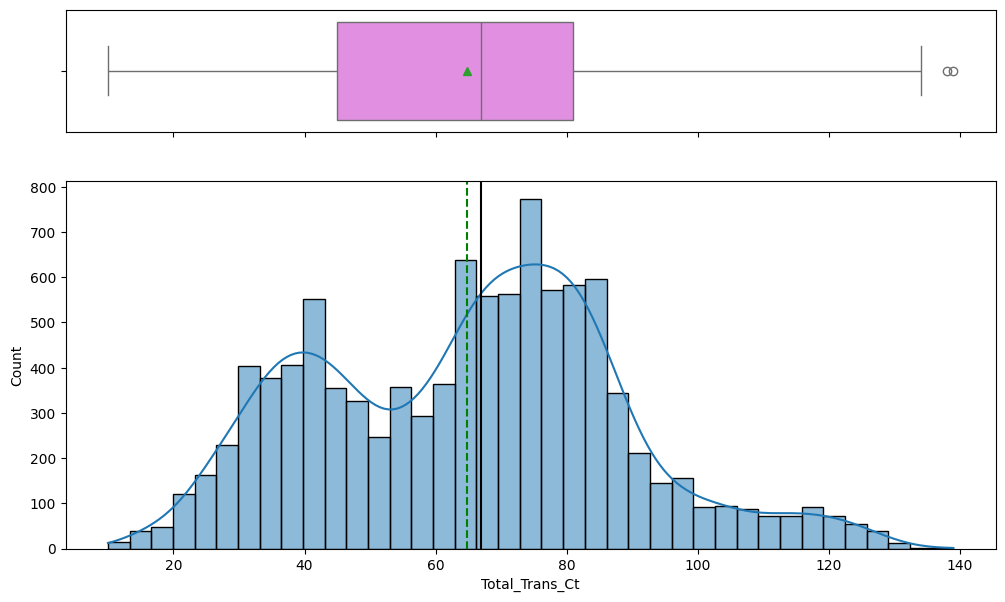

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

* Seems to be bimodal distribution with median and mean transaction count around 65 to 70
* There are only 2 outliers on right end.

###### Total_Amt_Chng_Q4_Q1

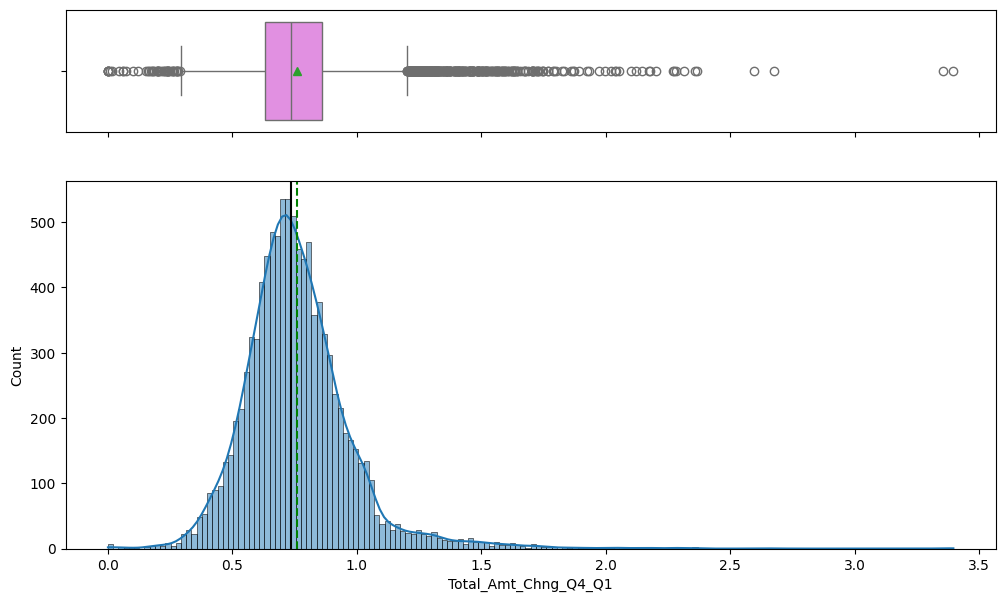

In [ ]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

* The data is slightly right skewed
* There are many outliers on higher and lower end
* The median change in transaction amounts from Q4 to Q1 is 0.74, indicating a modest growth in transaction amounts across these quarters.

###### Total_Trans_Amt

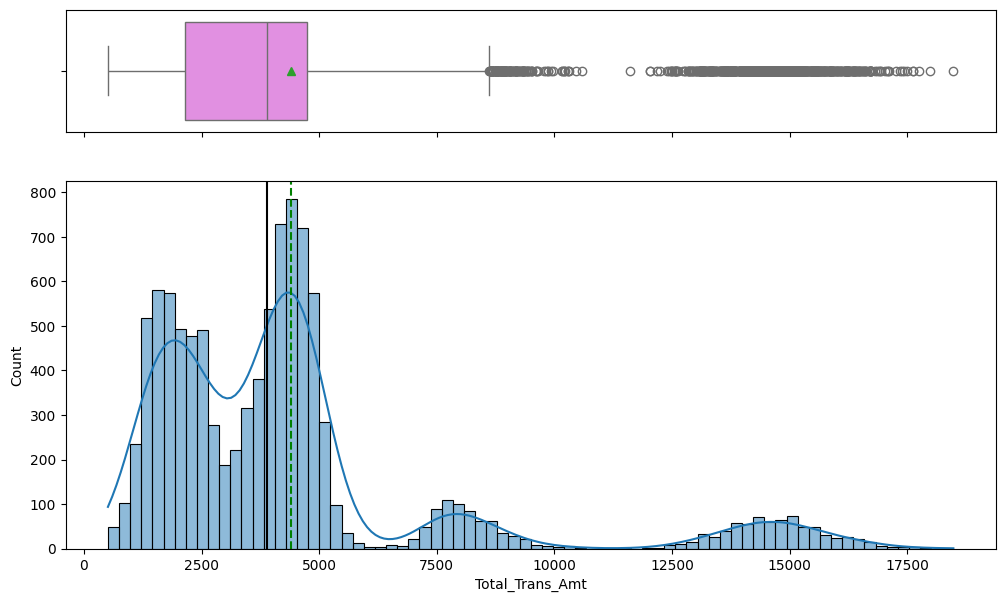

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

* The distribution is skewed to the right with multiple peaks.
* A large number of customers make transactions in the range of 2,000–5,000.
* A smaller group of customers makes transactions in the 10,000–15,000 range, possibly high-value customers.
* The presence of many outliers on higher end indicates that most customers have moderate transaction amounts


###### Total_Ct_Chng_Q4_Q1

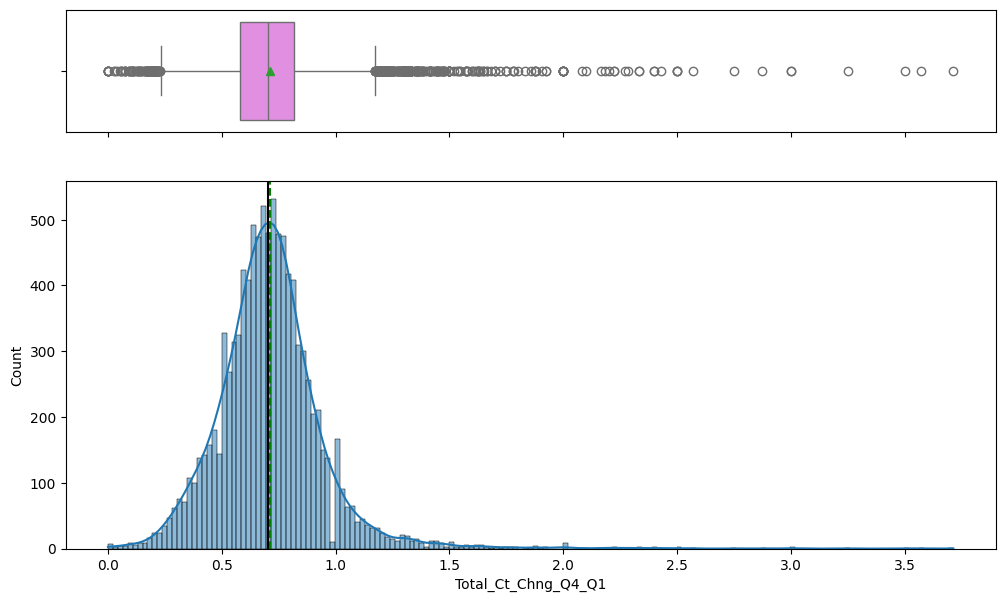

In [ ]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

*  The data is normally distributed with right skewness, indicating moderate change activity in initial quarters.
*  There are many outliers on higher and lower end.

###### Avg_Utilization_Ratio

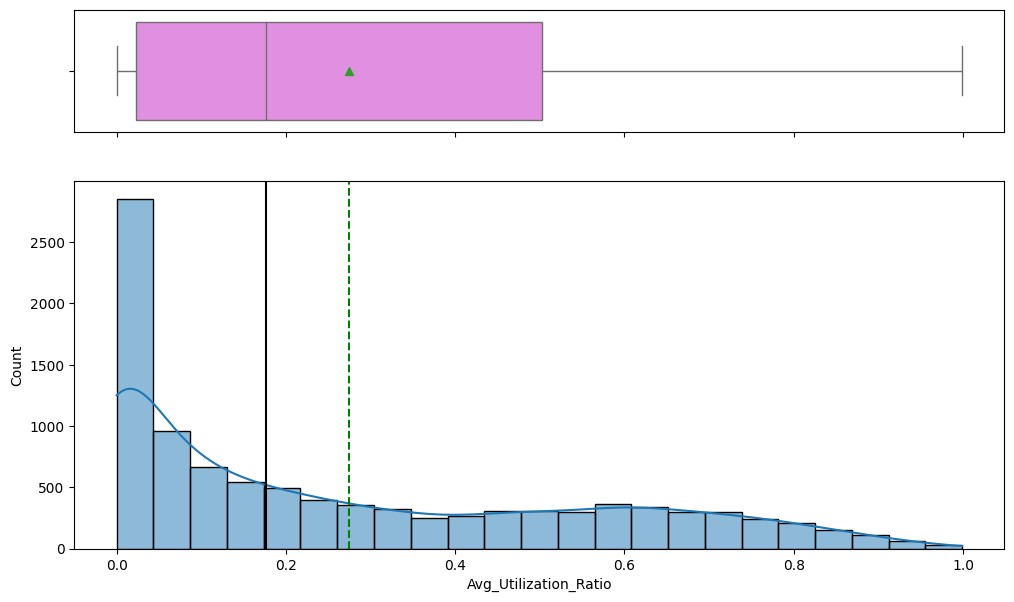

In [ ]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

* Average utilization is right skewed with mean utilization around 0.28
* 50% of the utilization ratio is below 0.2
* There are now outliers in data

###### Dependent_count

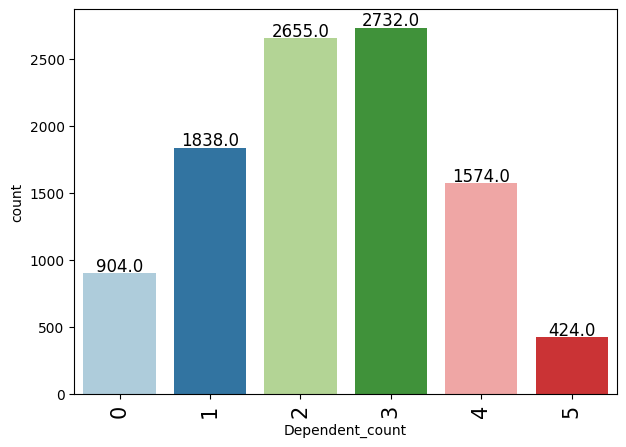

In [ ]:
labeled_barplot(data, "Dependent_count")

* Most of the customers have 2 to 3 dependents. Some have none

###### Total_Relationship_Count

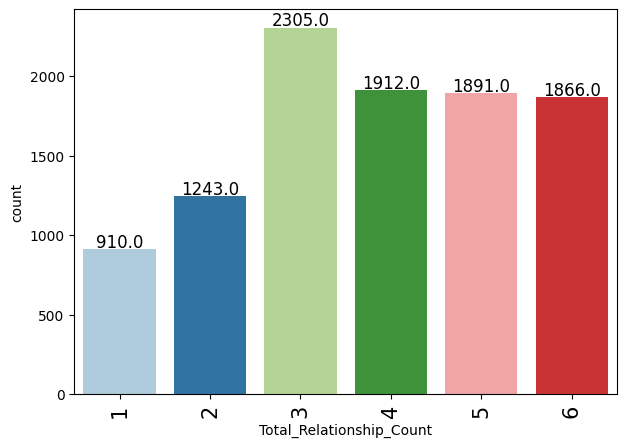

In [ ]:
labeled_barplot(data, "Total_Relationship_Count")

* Most customers have a relationship count of 3, with relatively even distributions across counts of 4 to 6, while fewer customers have only 1 or 2 relationships with the bank.

###### Months_Inactive_12_mon

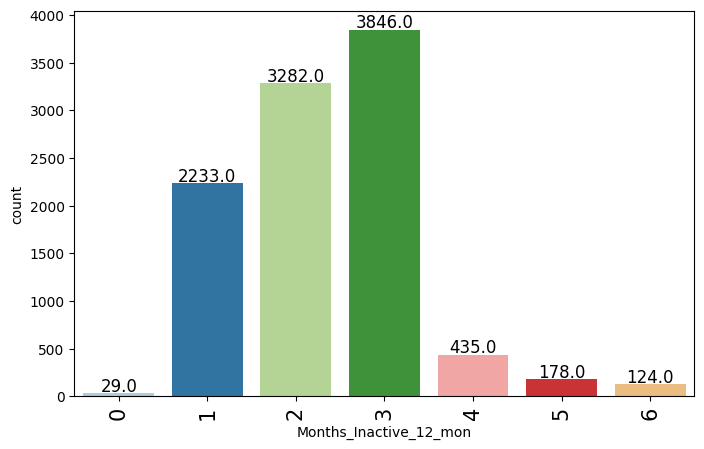

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon")

*  Most of the customers are inactive for 2 to 3 months which suggests shorter and temporary inactiveness

###### Contacts_Count_12_mon

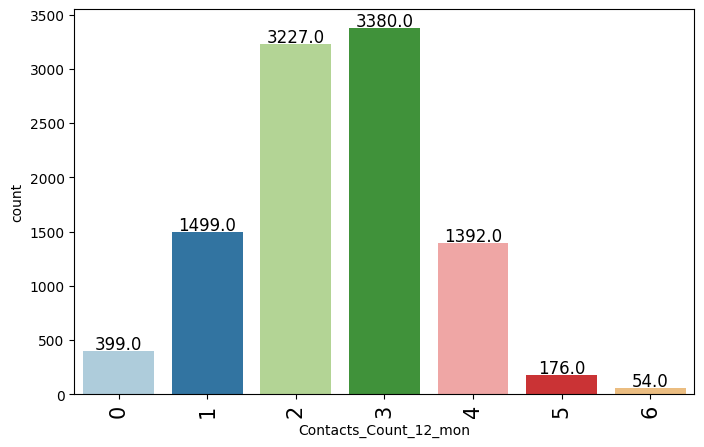

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon")

* The Counts suggests contacts concentrated around 2-3 contacts per year, implying that many customers require limited interaction with bank representatives.

###### Gender

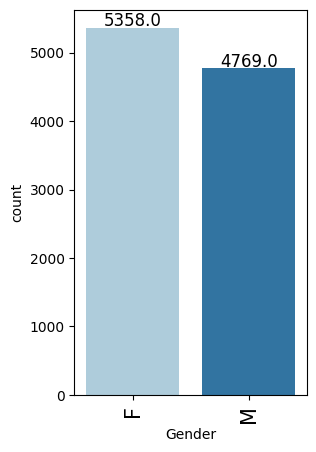

In [ ]:
labeled_barplot(data, "Gender")

* here is a slight majority of female customers.

###### Education_Level

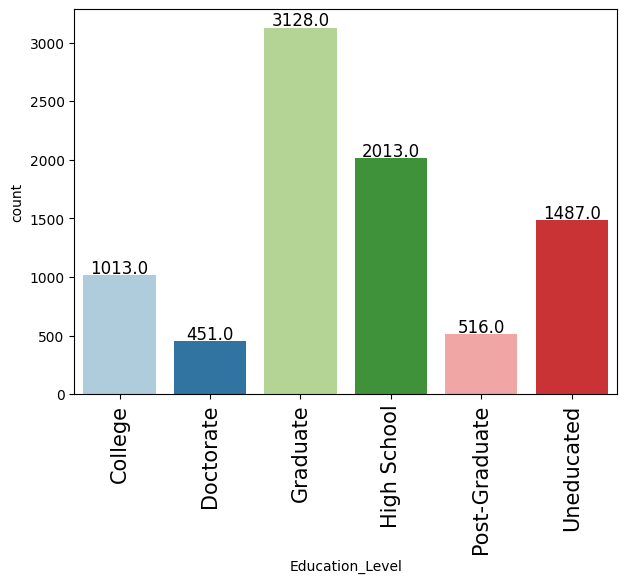

In [ ]:
labeled_barplot(data, "Education_Level")

* Most of the customers are graduates

###### Marital_Status

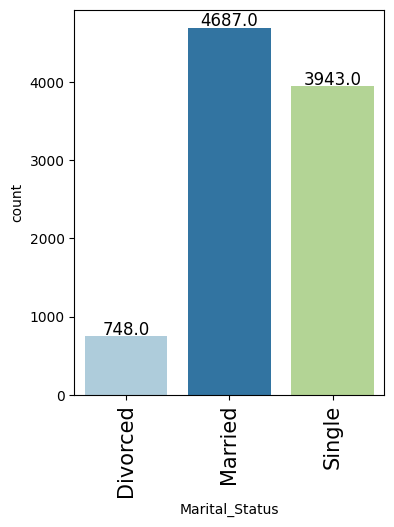

In [ ]:
labeled_barplot(data, "Marital_Status")

* Majority of the customers are seems to be married, followed by Singles, and very less count of divorced customers

###### Income_Category

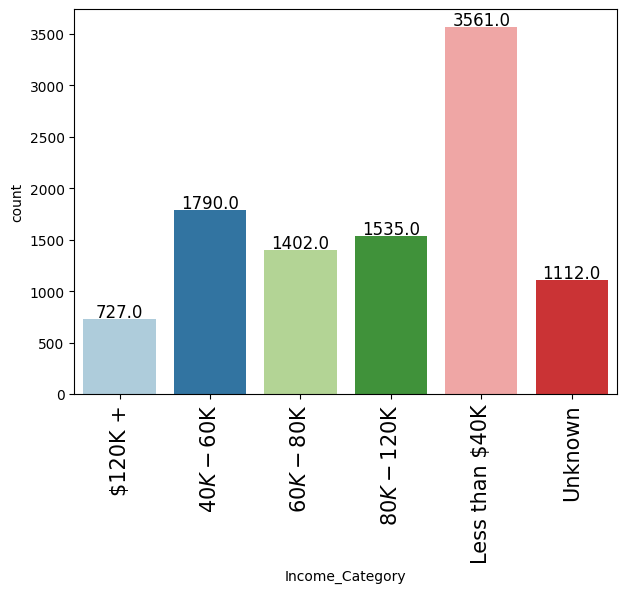

In [ ]:
labeled_barplot(data, "Income_Category")

*  Majority of the customers are having income less than 40k, others mostly from 40 to 120k
*  There are some customers with no information on income

###### Card_Category

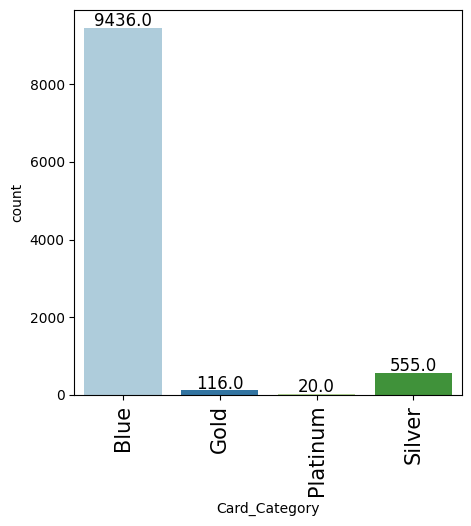

In [ ]:
labeled_barplot(data, "Card_Category")

* The vast majority of customers (93%) hold the basic "Blue" credit card. This indicates that more premium credit card offerings (Silver, Gold, Platinum) have very low penetration.

###### Attrition_Flag

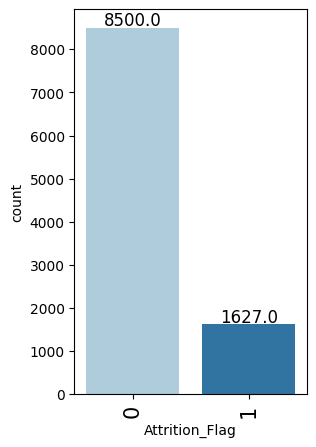

In [ ]:
labeled_barplot(data, "Attrition_Flag")

*  A large majority of customers are retained (existing customers), suggesting good customer retention overall.
*  However there are around 1600+ customer attrited which is important to understand for planning retention strategies

#### Bivariate Analysis

###### Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


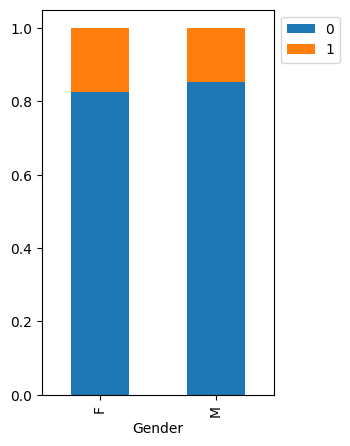

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

*  With very slight difference, Female customers shows little bit more numbers in attrition
*  Considering the overall distribution there seems to be no relation in Gender and attrition

###### Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
Unknown           925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


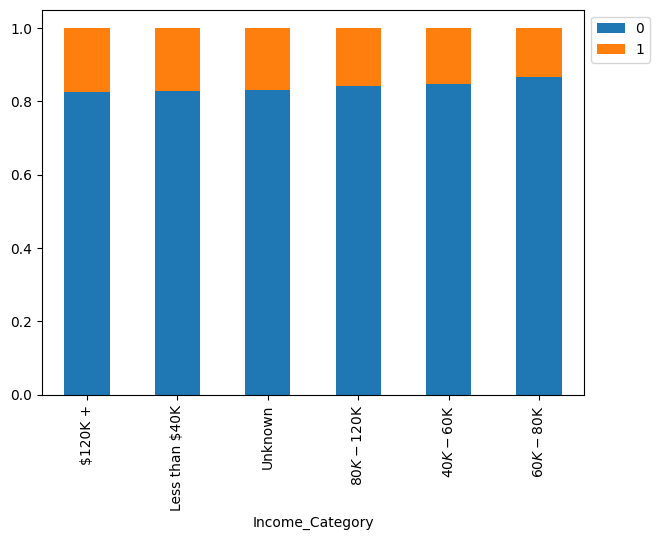

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* The majority of individuals across all income categories fall into the "0" i.e. existing customer group, with a relatively smaller proportion in the "1" group i.e. attrited group
* The disrtibution shows fairly consistent indicating there is no conserable relation between Income category and Attrition flag

###### Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


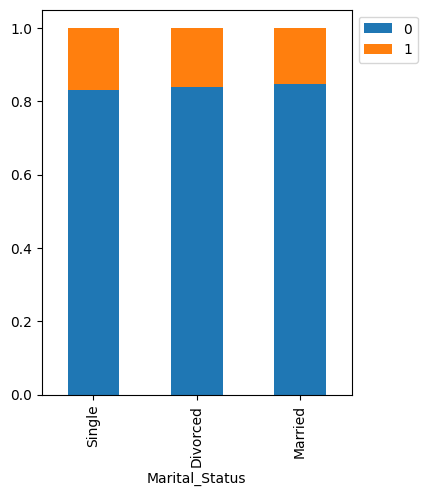

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

In [ ]:
data.groupby("Marital_Status")['Attrition_Flag'].value_counts(normalize=True)

Marital_Status  Attrition_Flag
Divorced        0                0.838
                1                0.162
Married         0                0.849
                1                0.151
Single          0                0.831
                1                0.169
Name: proportion, dtype: float64

* The disrtibution is fairly consistent indicating there is no conserable relation between Marital status and Attrition flag
* All status have almost same % of existing and attrited customer.

###### Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


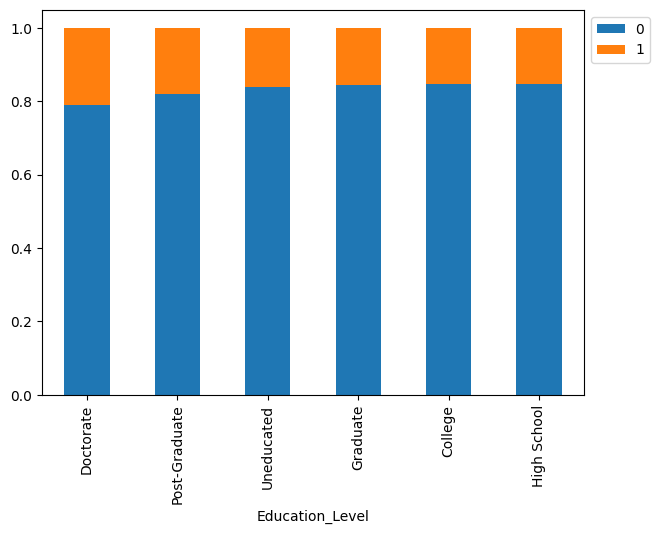

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* Doctorate people shows little more attrited compare to other education level. Still the difference is not much to consider.
* There is no considerable relation between Education level and custumer attrition

###### Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


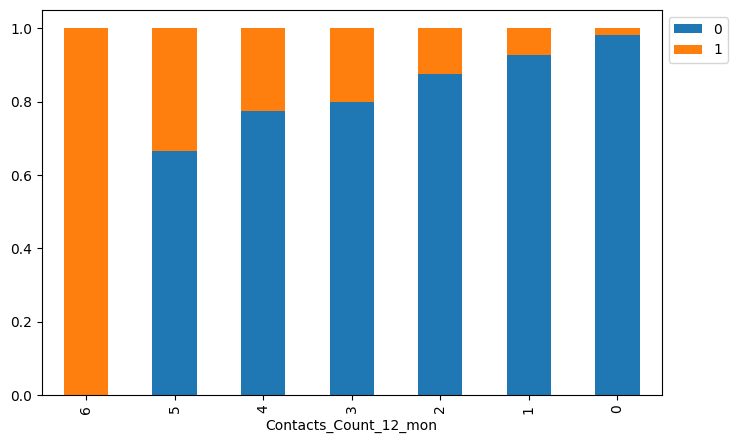

In [ ]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* Customer with higher number of times contacted with or by the bank seems to be attrited.

###### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


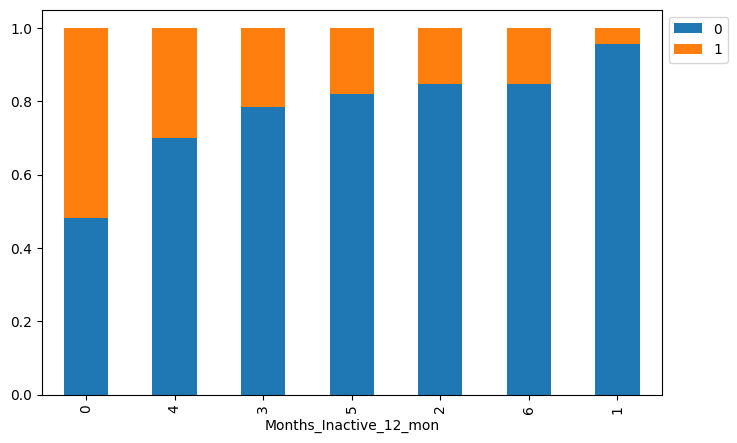

In [ ]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

*  Customers with 0 month of inactiveness i.e. most active customers seems to be more attrited
*  But as it can be seen data is not showing consistency with inactive months and attrited numbers cannot imply any specific relationship

###### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


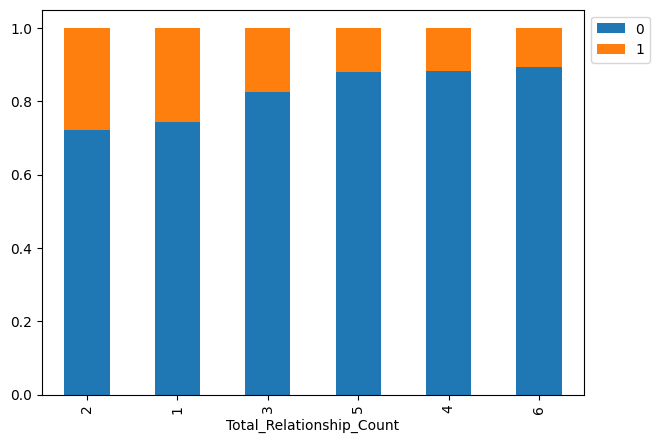

In [ ]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* Customer with 1 or 2 products showing more attrition number compare to others

###### Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


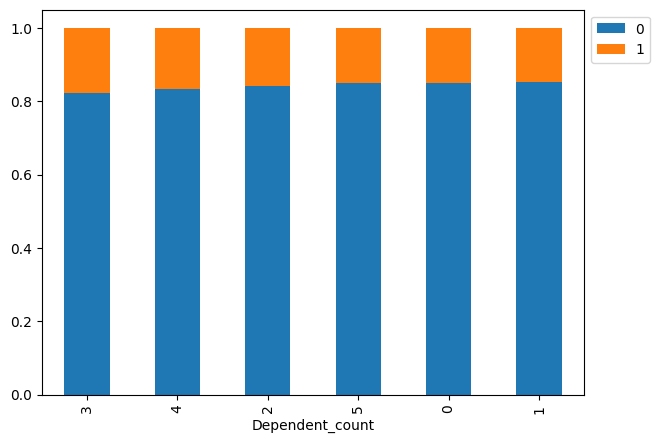

In [ ]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* As the distribution seems to be fairly consistent there is not relation between no of dependents and attrition

###### Total_Revolving_Bal vs Attrition_Flag

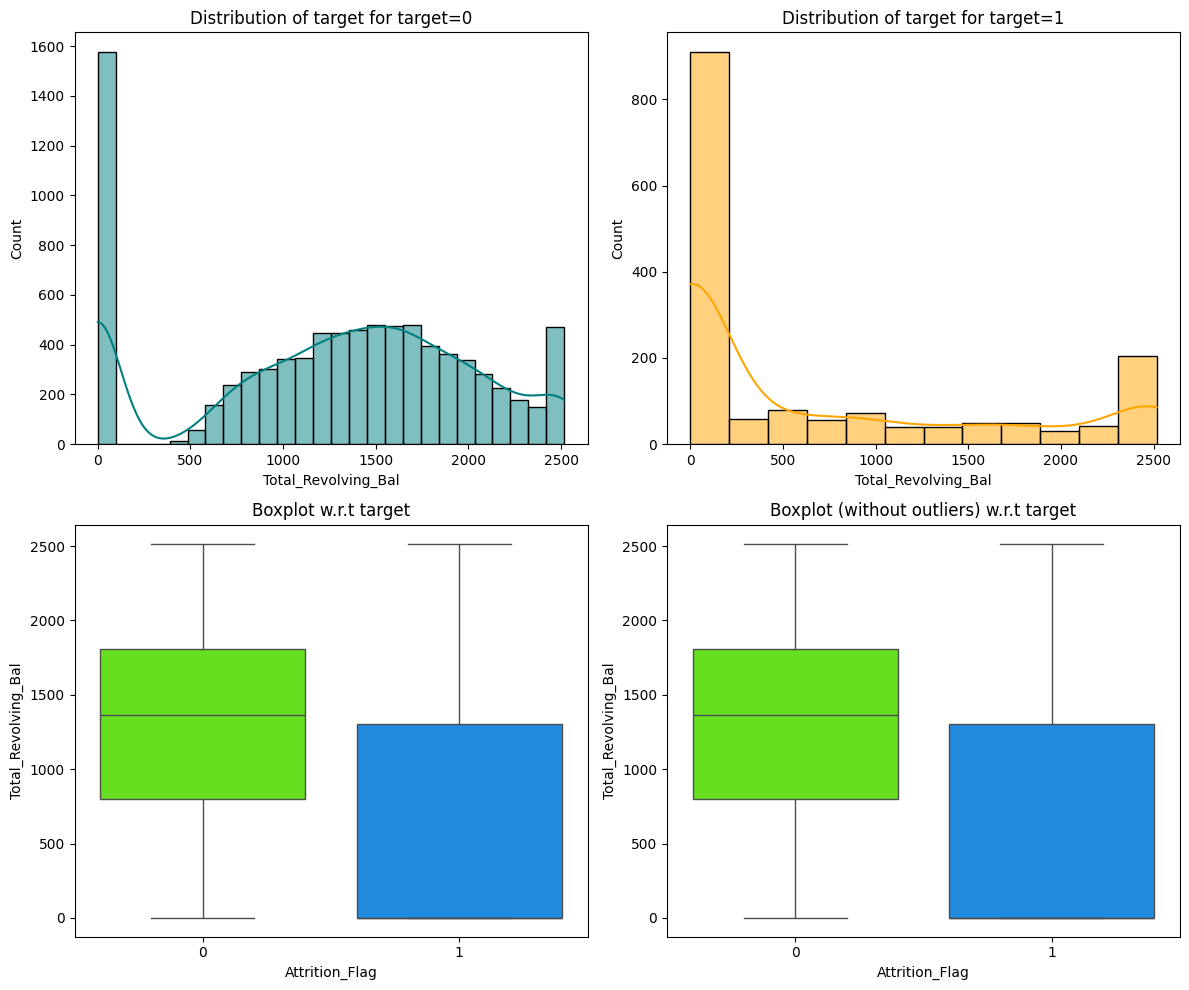

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* The Total Revolving Balance seems to be in similar range for both the classes


###### Attrition_Flag vs Credit_Limit

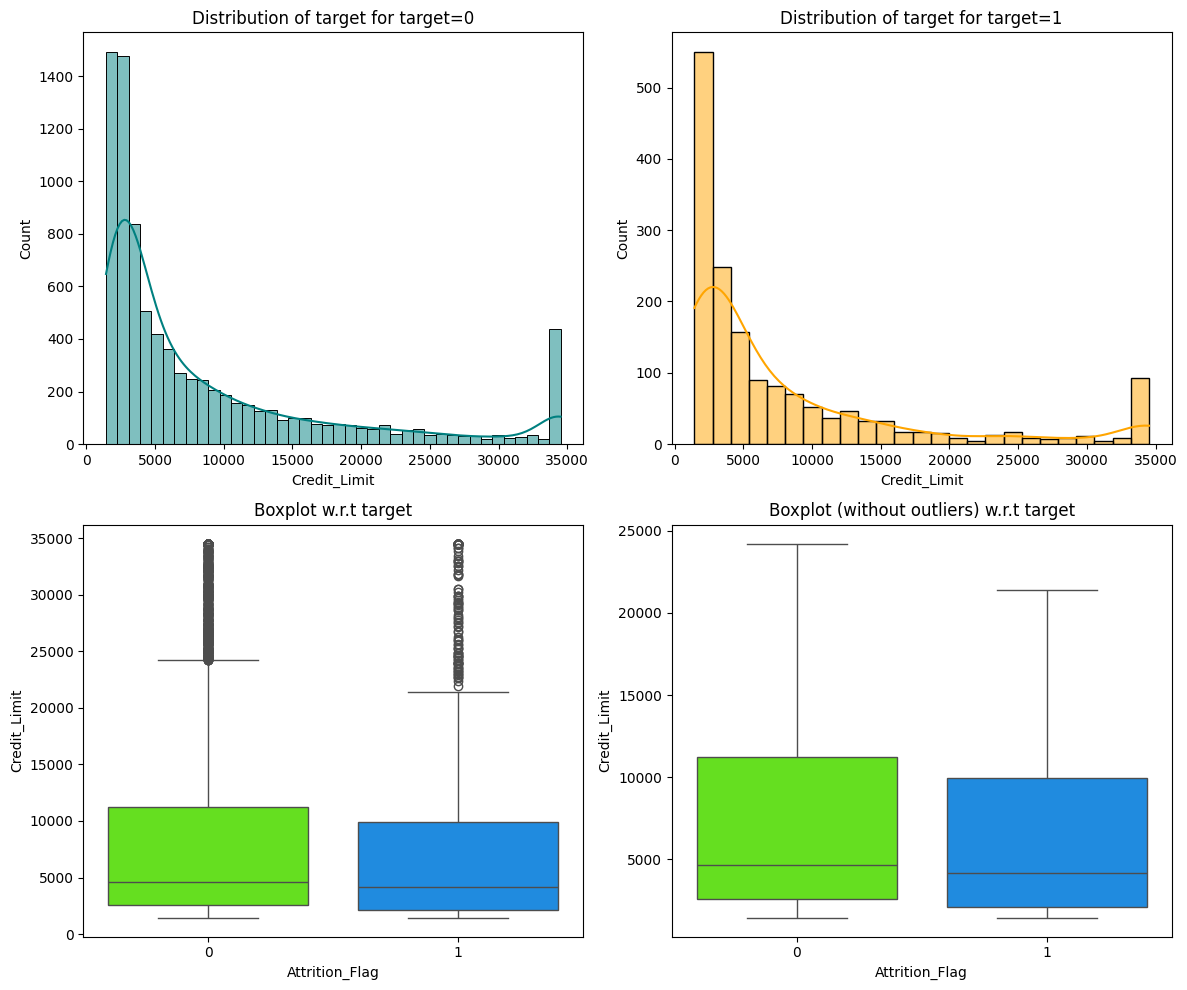

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

* The credit limit seems to be close to similar for both the classes

###### Attrition_Flag vs Customer_Age

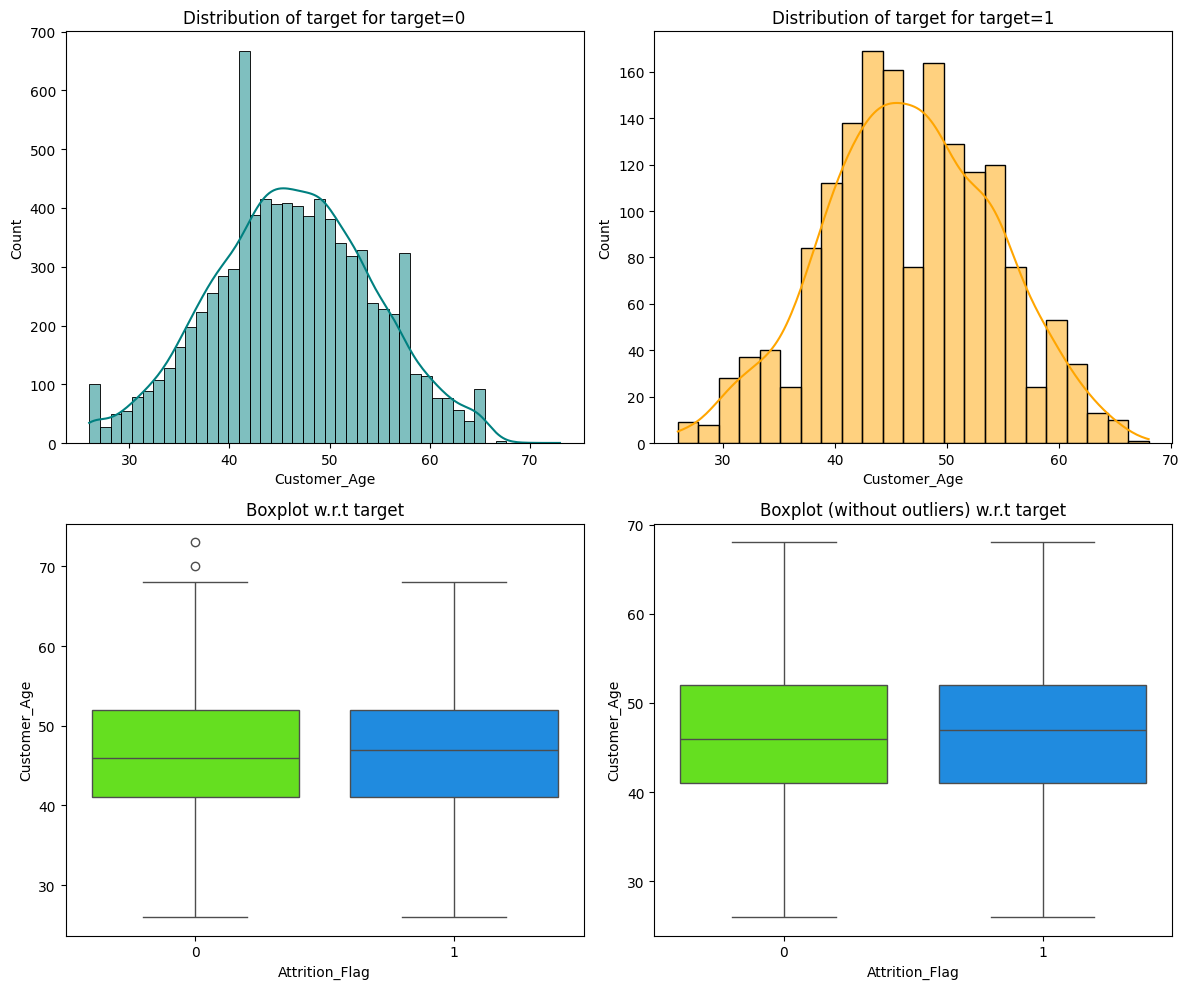

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

* There is not considerable the age group differentiation for existing and attrited customers. Customers seems to be similar age group for both classes with majority around age group of 40 to 55


###### Total_Trans_Ct vs Attrition_Flag

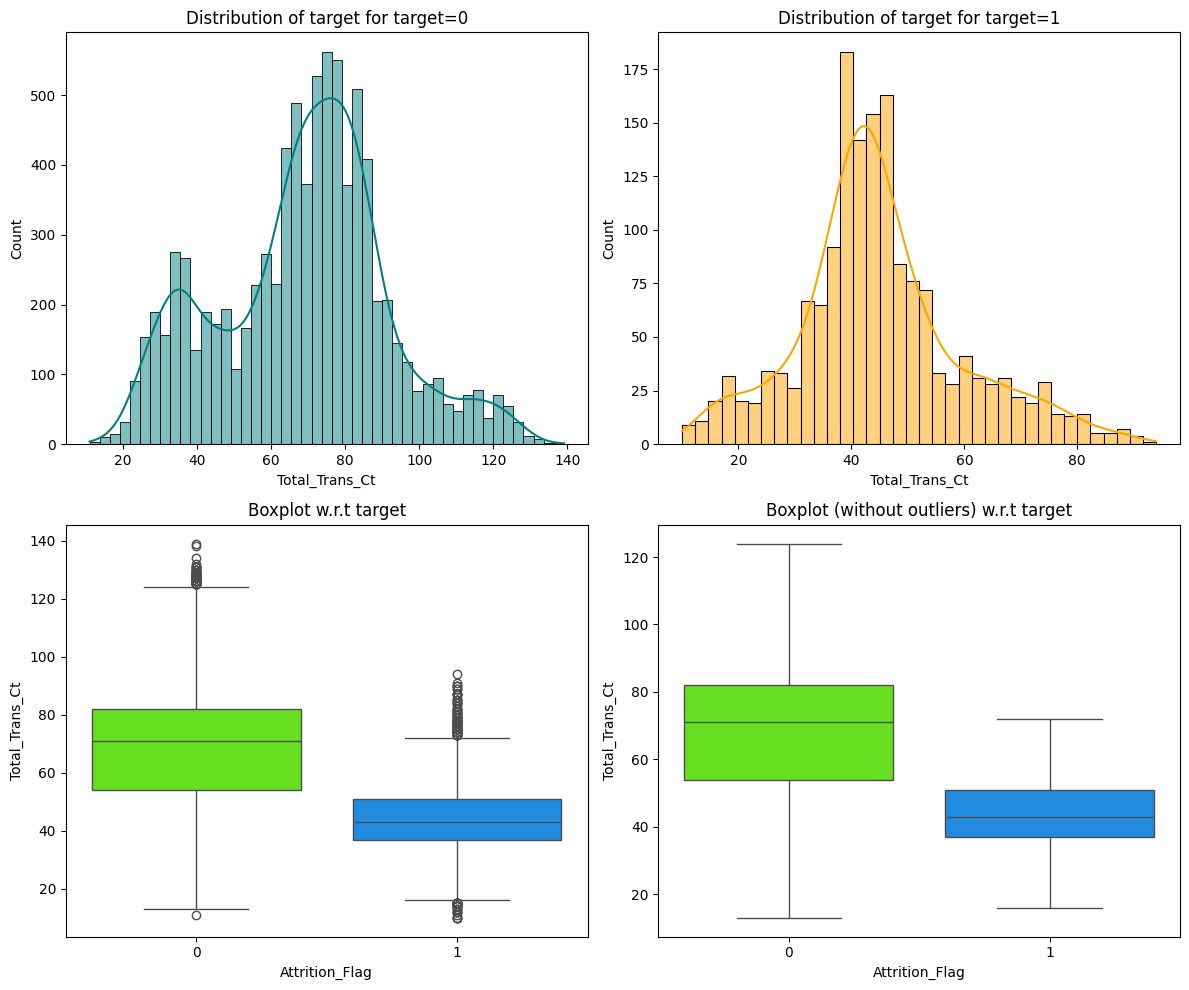

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* Attrited customers have lowet transaction count (range 35 to 50 for 50% of the customers) compare to exsting customer (range 55 to 80 for 50% of the customers)

###### Total_Trans_Amt vs Attrition_Flag

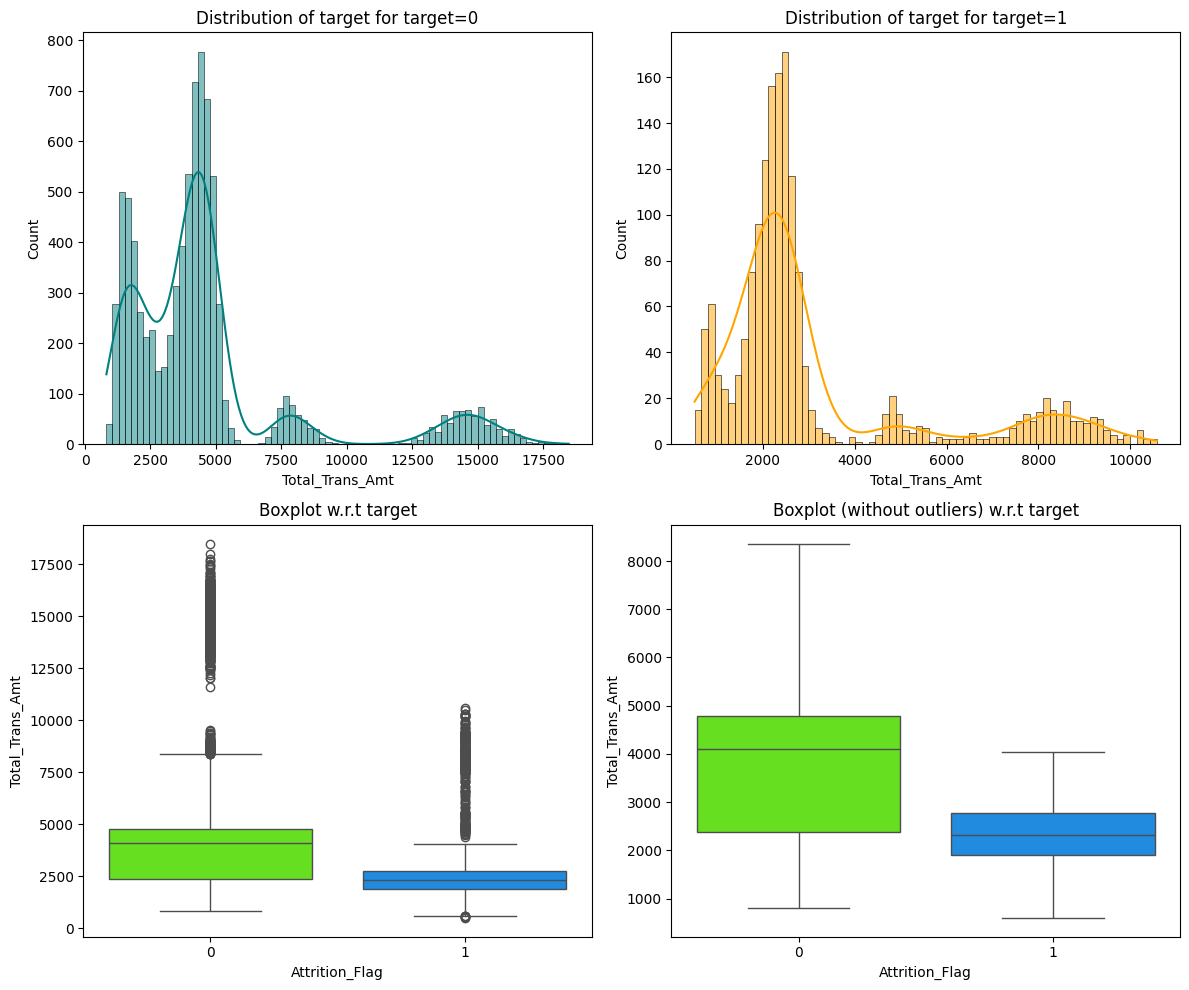

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* Attrited customers have lower transaction amount compare to existed customers.

###### Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

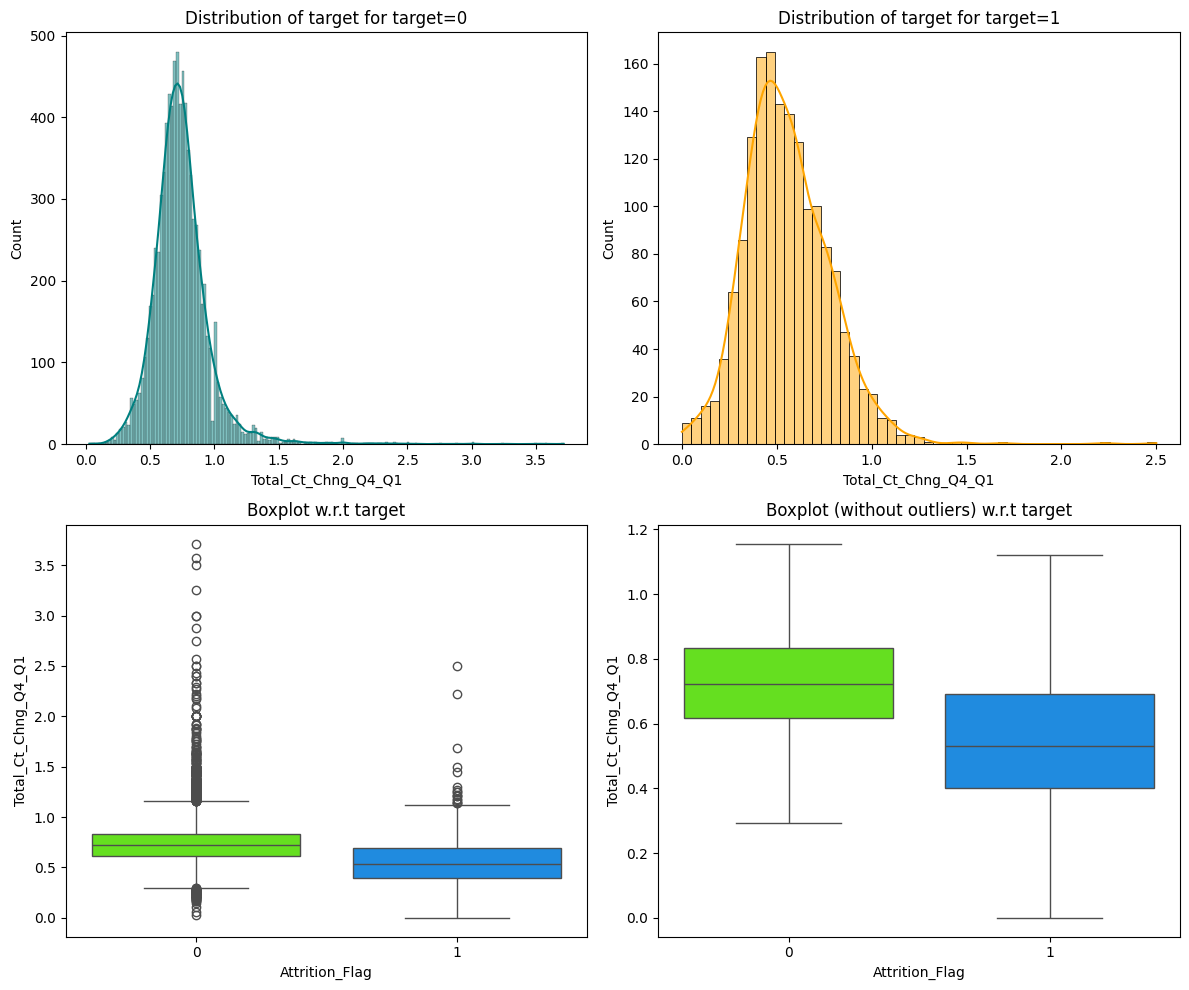

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Attrited customers have lower transaction count change Q4 to Q1

###### Avg_Utilization_Ratio vs Attrition_Flag

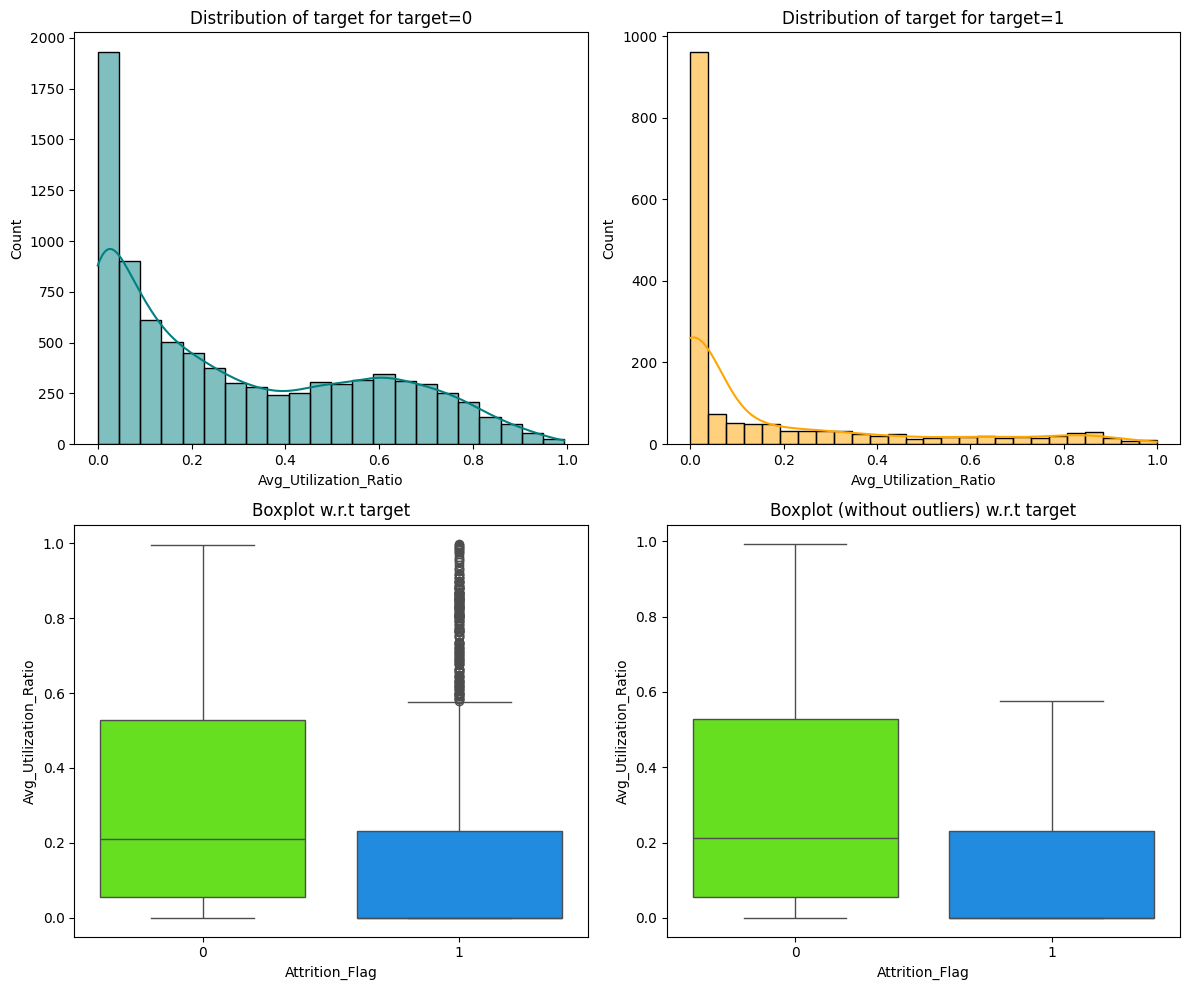

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* Attrited customers have lower utilization ratio

###### Months_on_book vs Attrition_Flag

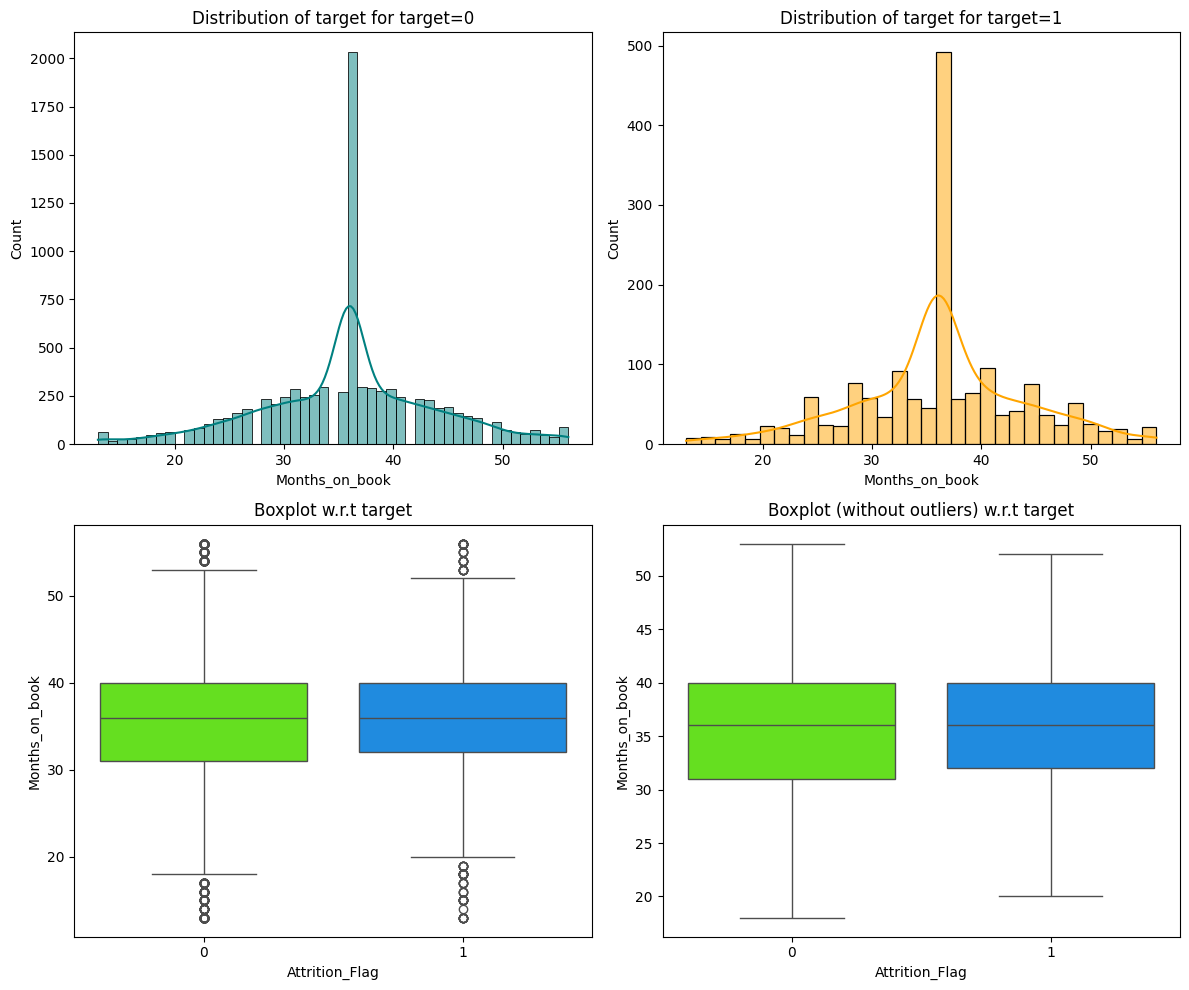

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

* There is no considerable relation between Months on Book and attrited customers

 ###### Avg_Open_To_Buy vs Attrition_Flag

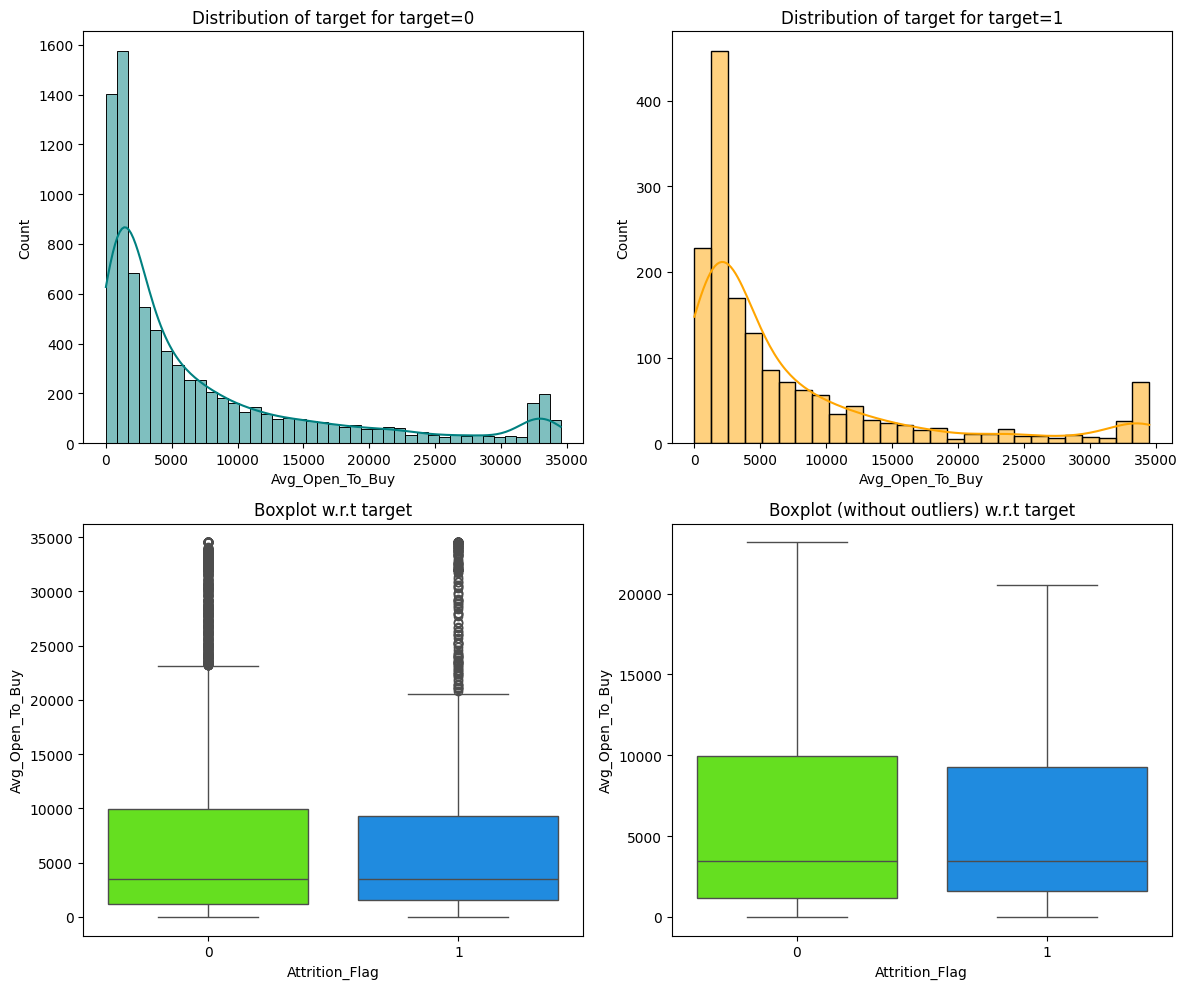

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

* There is no considerable relation between Avg open to Buy and attrited customers

#### Check Correlation between variables

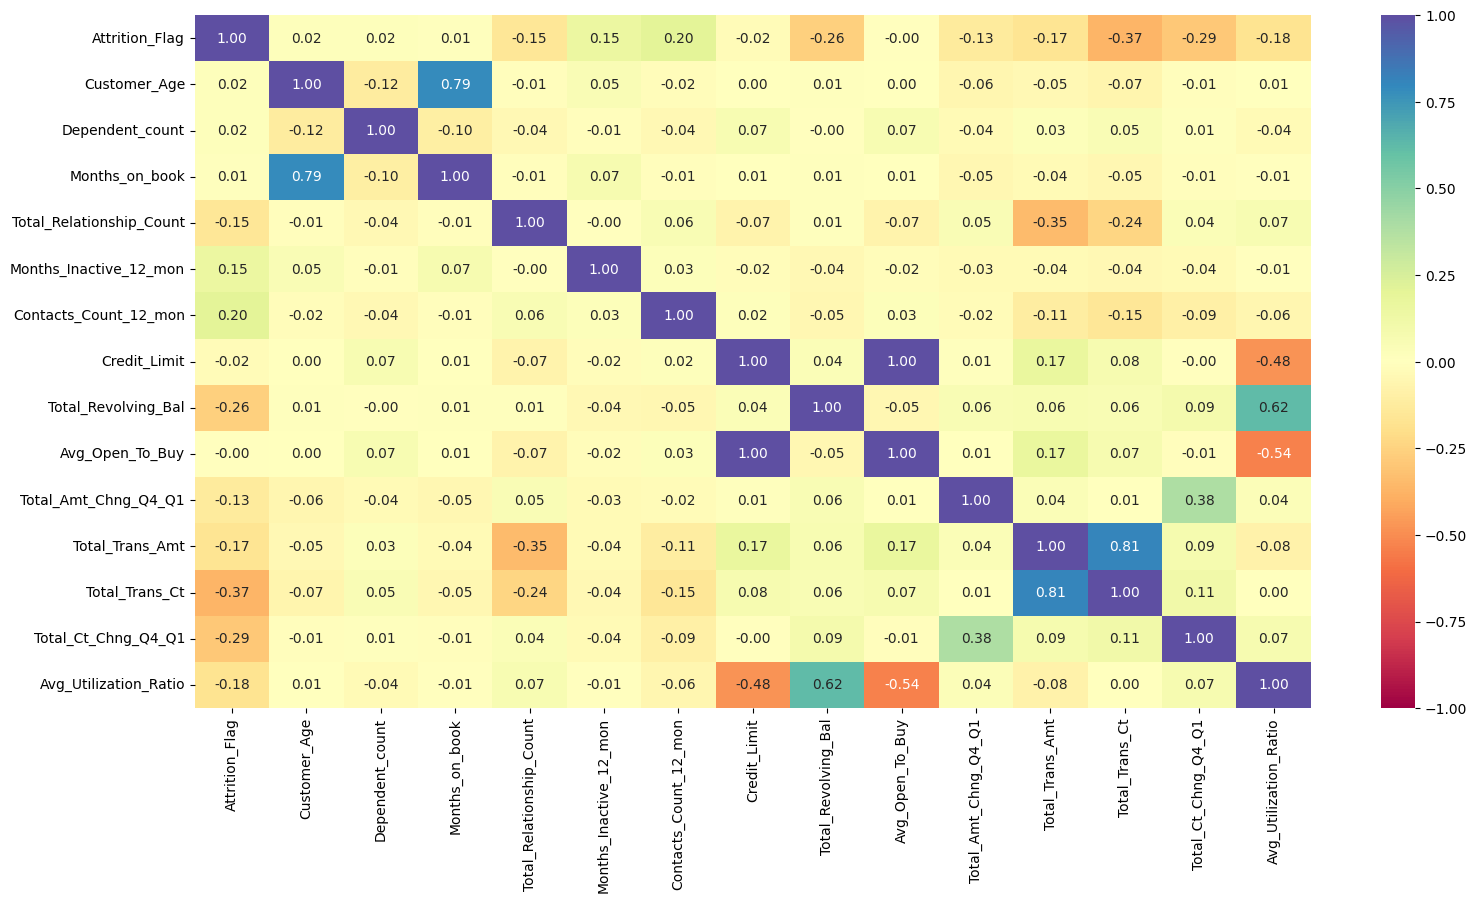

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The "Credit Limit" and "Average Open to Buy" are completely related so they provide the same information. One of them can be removed in data pre-processing
* "Total transaction amount" and "Total transaction count" shows strong relationship
* "Months on Book" and "Customer Age" also show a strong relationship.
* "Average Utilization Ratio" and "Total Revolving Balance" seem to be somewhat linked.
* Attrition Flag does not have strong correlation with any of the numeric variables

## Data Pre-processing

##### Outlier Detection

In [ ]:
#Get the numerical features from dataset

numerical_features = data.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)

['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
Q1 = data[numerical_features].quantile(0.25)  # To find the 25th percentile
Q3 = data[numerical_features].quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# Calculate outliers for each column (using element-wise comparison) for numeric columns
outliers = (data[numerical_features] < lower) | (data[numerical_features] > upper)

# Calculate the percentage of outliers in each column
outliers_percentage = (outliers.sum() / len(data)) * 100

# Display the percentage of outliers for each column
print(outliers_percentage)

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64


In [ ]:
outliers.sum()

,0
Attrition_Flag,1627
Customer_Age,2
Dependent_count,0
Months_on_book,386
Total_Relationship_Count,0
Months_Inactive_12_mon,331
Contacts_Count_12_mon,629
Credit_Limit,984
Total_Revolving_Bal,0
Avg_Open_To_Buy,963


There are some outliers in data like credit limit, total transaction amount & Avg optn to buy variables, but as it seems to be valid values according to some high end customer and we want out model to learn the pattern considering such customers so we will not treat them.


#### Train-Test Split

In [ ]:
# Let's create copy of dataset for further processing
data1 = data.copy()

In [ ]:
data1['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [ ]:
# Replace anomalous values in 'Income_Category' with NaN
data1['Income_Category'] = data1['Income_Category'].replace(['Unknown'], np.nan)

In [ ]:
# Check null values
data1.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
# Divide data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into temporary and test set with raition 80:20
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Validation: 
 Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64


Test: 
 Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64


## Missing value imputation




In [ ]:
# Create an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
columns_to_impute = ["Income_Category", "Education_Level", "Marital_Status"]

In [ ]:
# Fit and transform the train data
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])

# Transform the validation data
X_val[columns_to_impute] = imputer.transform(X_val[columns_to_impute])

# Tramsform the test data
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])

In [ ]:
# Check no column has missing values in train, validation & test sets
print(X_train.isna().sum())
print("======================================")
print(X_val.isna().sum())
print("======================================")
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy            

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64
********************************************************************************


#### Encoding categorical variables

In [ ]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True


## Model Building

### Model evaluation criterion

**Model can make wrong predictions as:**
- Predicting a customer will attrite and the customer does not attrite - Loss of resources
- Predicting a customer will not attrite and the customer attrites - Loss of opportunity/ losing valuable customer


**Which metric to optimize?**
* Predicting a customer will not attrite and the customer attrites i.e. Loss of opportunity/ losing valuable customer. So, the false negatives should be minimized.

**How to reduce this loss i.e need to reduce False Negatives?**
* Bank wants Recall to be maximized, greater the Recall lesser the chances of false negatives and lesser the chances of losing opportunity

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random forest: 1.0
Decision tree: 1.0
AdaBoost: 0.826844262295082
GBM: 0.875
XGBoost: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
Decision tree: 0.8159509202453987
AdaBoost: 0.852760736196319
GBM: 0.8588957055214724
XGBoost: 0.901840490797546


* Comparing the performance on train and validation set, XGBoost has given the most generic performance compare to other models, followed by Adaboost & GBM

### Model Building with Oversampled data


In [ ]:
# Print count of labels before oversampling
print("Before OverSampling count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling count of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# Print count of labels after oversampling
print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {}".format(sum(y_train_over == 0)))


Before OverSampling count of label '1': 976
Before OverSampling count of label '0': 5099 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099


Code for model building with Oversampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9976465973720338
Random forest: 1.0
Decision tree: 1.0
AdaBoost: 0.964698960580506
GBM: 0.9792116101196313
XGBoost: 1.0

Validation Performance:

Bagging: 0.8619631901840491
Random forest: 0.8619631901840491
Decision tree: 0.8650306748466258
AdaBoost: 0.901840490797546
GBM: 0.9049079754601227
XGBoost: 0.9294478527607362


* Comparing performance oversampled training and set and validation set, Adaboost given more generalized performace compare to others follwoed by XGboost and GBM

### Model Building with Undersampled data

In [ ]:
# Print count of labels before undersampling
print("Before Undersampling count of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling count of label '0': {} \n".format(sum(y_train == 0)))

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

# Print count of lables after undersampling
print("After Undersampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, count of label '0': {}".format(sum(y_train_un == 0)))

Before Undersampling count of label '1': 976
Before Undersampling count of label '0': 5099 

After Undersampling, count of label '1': 976
After Undersampling, count of label '0': 976


Code for model building based on undersampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
Decision tree: 1.0
AdaBoost: 0.9528688524590164
GBM: 0.9805327868852459
XGBoost: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
Decision tree: 0.9202453987730062
AdaBoost: 0.9601226993865031
GBM: 0.9570552147239264
XGBoost: 0.9693251533742331


* Comparing performances on undersampled training set and validation set, Adaboost goves the best generalized performance compare to other models followed by GBM & XGBoost

Selection of Top 3 models for tuning



* For tuning the models we will pick best 3 models out of above build 15 models.
* As per the models performance comparision, XGBoost, AdaBoost and Gradient Boost models have given more consistent and good performace for all 3 datasets(orginial, oversampled, undersampled) So, we will tune these 3 models
* As undersampled data is giving better performance we will tune these models on undersampled data and also with original data
* Also as sometimes there might be overfitting of data, so we will do hyper parameter tunning on oversampled data as well (to refer optionally)

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Hyperparameter tuning of models sequence (For reference)
1.   Tuning Gradient Boost model with original data
2.   Tuning Gradient Boost model with undersampled data
3.   XGBoost model tunning with original data
4.   XGBoost model tunning with Undersampled data
5.   Tunning Adaboost model with Original data
6.   Tunning Adaboost model with Undersampled data
7.   Tunning Gradient Boost model with Oversampled data
8.   Tunning Gradient Boost model with Oversampled data
9.   Tunning Gradient Boost model with Oversampled data



#### Tuning Gradient Boost model with original data

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,130,25),
    "learning_rate": [0.01,0.25,0.05],
    "subsample":[0.9,1,1.1],
    "max_features":[0.5,0.7,1],
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.25, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8544845630559916:


In [ ]:
# Building the model with resulted best parameters
gbm_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=125,
    max_features=0.5,
    learning_rate=0.25,
    init=AdaBoostClassifier(random_state=1),
)
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.25, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.9)

In [ ]:
# Checking model performance on training set
gbm_tuned_train_perf = model_performance_classification_sklearn(
    gbm_tuned, X_train, y_train
)
gbm_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.992,0.961,0.986,0.974


In [ ]:
# Check model performance on validation set
gbm_tuned_val_perf = model_performance_classification_sklearn(
    gbm_tuned, X_val, y_val
)
gbm_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.971,0.883,0.935,0.909


#### Tuning Gradient Boost model with undersampled data

In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508320251177395:


In [ ]:
# Building the model with resulted best parameters
gbm_tuned_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
gbm_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [ ]:
# Check model performance on undersampled training set
gbm_tuned_un_train_perf = model_performance_classification_sklearn(
    gbm_tuned_un, X_train_un, y_train_un
)
gbm_tuned_un_train_perf

,Accuracy,Recall,Precision,F1
0,0.970,0.975,0.966,0.970


In [ ]:
# Check model performace on validation set
gbm_tuned_un_val_perf = model_performance_classification_sklearn(
    gbm_tuned_un, X_val, y_val
)
gbm_tuned_un_val_perf

,Accuracy,Recall,Precision,F1
0,0.939,0.957,0.739,0.834


#### XGBoost model tunning with original data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9190528519099948:
CPU times: user 2.35 s, sys: 225 ms, total: 2.58 s
Wall time: 1min 4s


In [ ]:
# Building the model with resulted best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=5,
    learning_rate=0.05,
    gamma=3,
    subsample=0.9,
    eval_metric="logloss"
)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Check model performance on undersampled training set
xgb_tuned_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.981,1.000,0.895,0.944


In [ ]:
# Check model performance on validation set
xgb_tuned_val_perf = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)
xgb_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.960,0.942,0.832,0.883


#### XGBoost model tunning with Undersampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 2.32 s, sys: 136 ms, total: 2.46 s
Wall time: 45.8 s


In [ ]:
# Building the model with resulted best parameters
xgb_tuned_un = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    learning_rate=0.01,
    gamma=3,
    subsample=0.7,
    eval_metric="logloss"
)
xgb_tuned_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Check model performance on undersampled train data
xgb_tuned_un_train_perf = model_performance_classification_sklearn(
    xgb_tuned_un, X_train_un, y_train_un
)
xgb_tuned_un_train_perf

,Accuracy,Recall,Precision,F1
0,0.763,1.000,0.678,0.808


In [ ]:
# Check model performance on validation dataset
xgb_tuned_un_val_perf = model_performance_classification_sklearn(
    xgb_tuned_un, X_val, y_val
)
xgb_tuned_un_val_perf

,Accuracy,Recall,Precision,F1
0,0.582,1.000,0.278,0.435


#### Tunning Adaboost model with Original data

---



In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8421821036106751:


In [ ]:
# Build model based on resulted best parameters
adaboost_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
adaboost_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Check model performance on training dataset
adaboost_tuned_train_perf = model_performance_classification_sklearn(
    adaboost_tuned, X_train, y_train
)
adaboost_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.982,0.927,0.961,0.944


In [ ]:
# Check model performance on validation dataset
adaboost_tuned_val_perf = model_performance_classification_sklearn(
    adaboost_tuned, X_val, y_val
)
adaboost_tuned_val_perf

,Accuracy,Recall,Precision,F1
0,0.967,0.856,0.933,0.893


#### Tunning Adaboost model with Undersampled data


In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9477603349031922:


In [ ]:
# Build model based on resulted best parameters
adaboost_tuned_un = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
adaboost_tuned_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Check model performance on undersampled train dataset
adaboost_tuned_un_train_perf = model_performance_classification_sklearn(
    adaboost_tuned_un, X_train_un, y_train_un
)
adaboost_tuned_un_train_perf


,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [ ]:
# Check model performance on validation dataset
adaboost_tuned_un_val_perf = model_performance_classification_sklearn(
    adaboost_tuned_un, X_val, y_val
)
adaboost_tuned_un_val_perf

,Accuracy,Recall,Precision,F1
0,0.937,0.966,0.729,0.831


### Hyperparameter tunning for above 3 models on oversampled data (Optional)

#### Tunning Gradient Boost model with Oversampled data


In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,130,25),
    "learning_rate": [0.01,0.25,0.05],
    "subsample":[0.9,1,1.1],
    "max_features":[0.5,0.7,1],
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.25, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9570578614173832:


In [ ]:
# Build model with resulted best parameters
gbm_tuned_over = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.25,
    init=AdaBoostClassifier(random_state=1),
)
gbm_tuned_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.25, max_features=0.5, random_state=1,
                           subsample=1)

In [ ]:
# Check model performance on oversampled trained data
gbm_tuned_over_train_perf = model_performance_classification_sklearn(
    gbm_tuned_over, X_train_over, y_train_over
)
gbm_tuned_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.991,0.986,0.988


In [ ]:
# Check model performance on validation data
gbm_tuned_over_val_perf = model_performance_classification_sklearn(
    gbm_tuned_over, X_val, y_val
)
gbm_tuned_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.966,0.908,0.884,0.896


#### Tunning XGBoost model with Oversampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9994117647058823:
CPU times: user 2.81 s, sys: 301 ms, total: 3.11 s
Wall time: 1min 27s


In [ ]:
# Build model based on best parameters
xgb_tuned_over = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=5,
    learning_rate=0.01,
    gamma=3,
    subsample=0.7,
    eval_metric="logloss"
)
xgb_tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Check model performance on oversample train data set
xgb_tuned_over_train_perf = model_performance_classification_sklearn(
    xgb_tuned_over, X_train_over, y_train_over
)
xgb_tuned_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.793,1.000,0.707,0.828


In [ ]:
# check model performance on validation data set
xgb_tuned_over_val_perf = model_performance_classification_sklearn(
    xgb_tuned_over, X_val, y_val
)
xgb_tuned_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.651,1.000,0.315,0.479


Tunning AdaBoost model with Oversampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9515668956493293:


In [ ]:
# Building model based on resulted best parameters
adaboost_tuned_over = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
adaboost_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Check model performance on oversampled train data
adaboost_tuned_over_train_perf = model_performance_classification_sklearn(
    adaboost_tuned_over, X_train_over, y_train_over
)
adaboost_tuned_over_train_perf

,Accuracy,Recall,Precision,F1
0,0.985,0.985,0.985,0.985


In [ ]:
# Check model performance on validation data
adaboost_tuned_over_val_perf = model_performance_classification_sklearn(
    adaboost_tuned_over, X_val, y_val
)
adaboost_tuned_over_val_perf

,Accuracy,Recall,Precision,F1
0,0.968,0.908,0.894,0.901


## Model Comparison and Final Model Selection

In [ ]:
# Training Performance Comparison
models_train_comp_df = pd.concat(
    [
        gbm_tuned_train_perf.T,
        gbm_tuned_un_train_perf.T,
        gbm_tuned_over_train_perf.T,
        xgb_tuned_train_perf.T,
        xgb_tuned_un_train_perf.T,
        xgb_tuned_over_train_perf.T,
        adaboost_tuned_train_perf.T,
        adaboost_tuned_un_train_perf.T,
        adaboost_tuned_over_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
        "GBM_trained_Originial_data",
        "GBM_trained_Undersampled_data",
        "GBM_trained_Oversampled_data",
        "XGB_trained_Originial_data",
        "XGB_trained_Undersampled_data",
        "XGB_trained_Oversampled_data",
        "AdaBoost_trained_Originial_data",
        "AdaBoost_trained_Undersampled_data",
        "AdaBoost_trained_Oversampled_data",
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GBM_trained_Originial_data,GBM_trained_Undersampled_data,GBM_trained_Oversampled_data,XGB_trained_Originial_data,XGB_trained_Undersampled_data,XGB_trained_Oversampled_data,AdaBoost_trained_Originial_data,AdaBoost_trained_Undersampled_data,AdaBoost_trained_Oversampled_data
Accuracy,0.992,0.970,0.988,0.981,0.763,0.793,0.982,0.973,0.985
Recall,0.961,0.975,0.991,1.000,1.000,1.000,0.927,0.978,0.985
Precision,0.986,0.966,0.986,0.895,0.678,0.707,0.961,0.968,0.985
F1,0.974,0.970,0.988,0.944,0.808,0.828,0.944,0.973,0.985


In [ ]:
# Validation Performance Comparsion
models_val_comp_df = pd.concat(
    [
        gbm_tuned_val_perf.T,
        gbm_tuned_un_val_perf.T,
        gbm_tuned_over_val_perf.T,
        xgb_tuned_val_perf.T,
        xgb_tuned_un_val_perf.T,
        xgb_tuned_over_val_perf.T,
        adaboost_tuned_val_perf.T,
        adaboost_tuned_un_val_perf.T,
        adaboost_tuned_over_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
        "GBM_trained_Originial_data",
        "GBM_trained_Undersampled_data",
        "GBM_trained_Oversampled_data",
        "XGB_trained_Originial_data",
        "XGB_trained_Undersampled_data",
        "XGB_trained_Oversampled_data",
        "AdaBoost_trained_Originial_data",
        "AdaBoost_trained_Undersampled_data",
        "AdaBoost_trained_Oversampled_data",
    ]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,GBM_trained_Originial_data,GBM_trained_Undersampled_data,GBM_trained_Oversampled_data,XGB_trained_Originial_data,XGB_trained_Undersampled_data,XGB_trained_Oversampled_data,AdaBoost_trained_Originial_data,AdaBoost_trained_Undersampled_data,AdaBoost_trained_Oversampled_data
Accuracy,0.971,0.939,0.966,0.960,0.582,0.651,0.967,0.937,0.968
Recall,0.883,0.957,0.908,0.942,1.000,1.000,0.856,0.966,0.908
Precision,0.935,0.739,0.884,0.832,0.278,0.315,0.933,0.729,0.894
F1,0.909,0.834,0.896,0.883,0.435,0.479,0.893,0.831,0.901


Plot Confusion matrix for some better performerd model to understand more and conclude

In [ ]:
def make_confusion_matrix(model, test_X, y_actual, labels=[0, 1]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(5, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

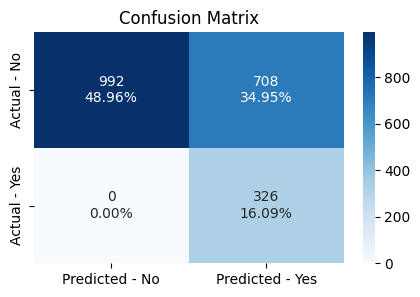

In [ ]:
make_confusion_matrix(xgb_tuned_over, X_val, y_val)

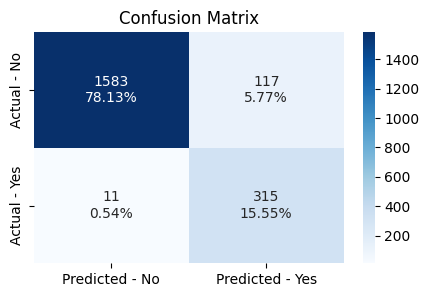

In [ ]:
make_confusion_matrix(adaboost_tuned_un, X_val, y_val)

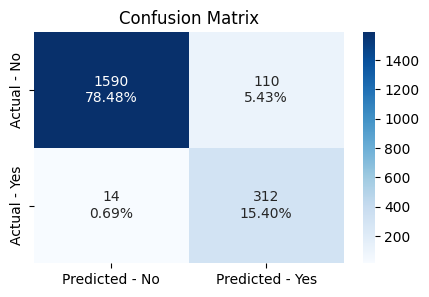

In [ ]:
make_confusion_matrix(gbm_tuned_un, X_val, y_val)

#### Final Model selection

* As per the comparsion XG Boost with undersample and oversampled data shows generalized performance considering the recall score 1. But precision is very low which will predict (False positive) customer attrited which are actully existing, which might cuase more resource cost investment. So we need to consider the optimized precision along with recall
* Adaboost and Gradient boost models with undersample data shows generalized performance with recall around 96% and 97% resp. on validation set and 98% and 97% on training set along with considerable precision score around ~74% on validation set.
* As both XGboost and Adaboost might be important models based on Banks requirements to understand predicted attrition.
* I would suggest Adaboost model trained on undersampled data would be the preffered model here considering high recall and considerable precision.

### Test set final performance

In [ ]:
# Check performance on test set for finalized Adaboost model
adaboost_tuned_un_test_perf = model_performance_classification_sklearn(
    adaboost_tuned_un, X_test, y_test
)
adaboost_tuned_un_test_perf

,Accuracy,Recall,Precision,F1
0,0.934,0.969,0.718,0.825


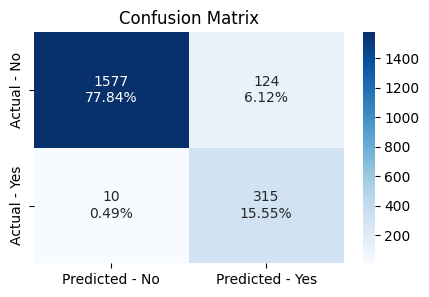

In [ ]:
make_confusion_matrix(adaboost_tuned_un, X_test, y_test)

* The performance of the model with test data is almost similar to the performance on the validation dataset. So we can coclude model is generlized well.

### Feature importance

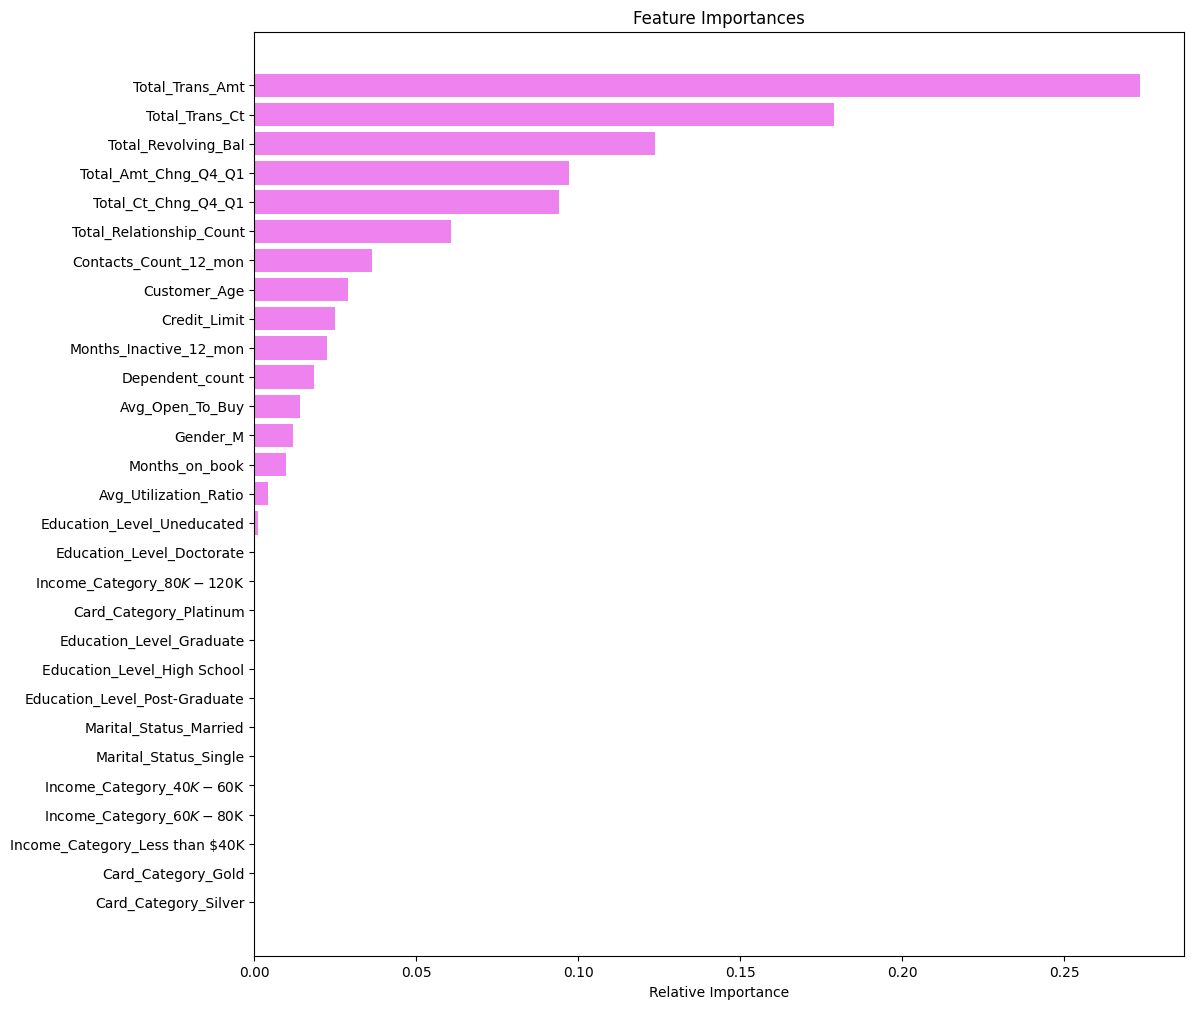

In [ ]:
# Check important features on finalized model
feature_names = X_train.columns
importances = adaboost_tuned_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Amt is the most important feature in predicting credict card churn.
* Total_Trans_Ct, Total_Revolving_Bal, Total_Amt_chng_Q4_Q1, Total_ct_Chng_Q4_Q1, Total_Relationship_count are other important attributes for prediction.

# Business Insights and Conclusions

* Based on suggested model bank can identify customers who are predicted to be attrited or customer who are supposed to be attrite
* Aslo bank can see the influential feature or attribues for attrition
* Based on the study bank can take appropriate steps to overcome attrition rate and plan better policies for retention
* As we can see *Total transaction amount* is one important influential factor where bank can work on how transaction amount can be increase by providing some offer on higher purchases which will ecourage customer to buy costly stuff and bank will have benifit with higher transactions
* *Total transaction count* is also other important factor. From EDA it can be seen that lower tns count leading to attrition, Here bank can provide offers like cashbacks or points or % discounts so that customer will purchase items to avail the offers and use their cards which will eventually increase the transaction counts
*  Considering *Total Revovling Balance* as per the EDA, Customer with less reloving balance are attrited, such customer might have attrited after clearing the dues, bank should reach out to the customers to understand root cause and try to resolve and ecourage them come back.
*  *Total Relationship Count* is another considerable feature, where EDA says customers with 1 or 2 products are attrited more. Bank should investigate more on what problems customers are facing, improve customer support and help to resolve issue they are facing.
*  We see that highest attrition amoung the customers who have been contacted more with the bank, which leads to the conclusion that bank might not be able to resolve their problmes. It is better to collect the feedback from the customer on support provided by bank and find our improvment areas to act on.
*  Considering inactive months, that is also one affective factore where bank can check for inactivity and remind or reachout to customer via messages or emails with new offers, customer specific services which will ecourage them to look out and being active.
* Increasing credit limits for specific group of customers who are tend to purchase more is also one important activity bank can take in consideration.


***

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Advanced_Machine_Learning/Project03/AML_Project03_LearnerNotebook_FullCode_Shraddha.ipynb' --output-dir '/content/drive/MyDrive/Colab Notebooks/AIMLCourse/Advanced_Machine_Learning/Project03'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Advanced_Machine_Learning/Project03/AML_Project03_LearnerNotebook_FullCode_Shraddha.ipynb to html
[NbConvertApp] Writing 3525197 bytes to /content/drive/MyDrive/Colab Notebooks/AIMLCourse/Advanced_Machine_Learning/Project03/AML_Project03_LearnerNotebook_FullCode_Shraddha.html
